In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
data = pd.read_csv("Fixed-Fixed.csv")
data.head()

,depth,l1,l2,Mode,Frequency,Max_Deflection,Average_Deflection
0,0.0,0,0,1,52.976,18.084,9.0351
1,0.0,0,0,2,145.920,17.293,9.3771
2,0.0,0,0,3,285.990,17.430,9.5803
3,0.0,0,0,4,323.400,28.366,10.8720
4,0.0,0,0,5,472.810,17.537,9.7190


In [5]:
data.isnull().sum()

depth                 0
l1                    0
l2                    0
Mode                  0
Frequency             0
Max_Deflection        0
Average_Deflection    0
dtype: int64

In [6]:
X = data.iloc[:,4:]
Y = data.iloc[:,:4]

In [7]:
Y

,depth,l1,l2,Mode
0,0.0,0,0,1
1,0.0,0,0,2
2,0.0,0,0,3
3,0.0,0,0,4
4,0.0,0,0,5
...,...,...,...,...
1231,5.0,820,990,2
1232,5.0,820,990,3
1233,5.0,820,990,4
1234,5.0,820,990,5


In [8]:
from sklearn.preprocessing import StandardScaler
def scale_datasets(x, y):
  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler1 = StandardScaler()
  standard_scaler2 = StandardScaler()
  x_scaled = pd.DataFrame(
      standard_scaler1.fit_transform(x),
      columns=x.columns
  )
  y_scaled = pd.DataFrame(
      standard_scaler2.fit_transform(y),
      columns = y.columns
  )
  return x_scaled, y_scaled
x_scaled, y_scaled = scale_datasets(X, Y)

In [9]:
y_scaled

,depth,l1,l2,Mode
0,-1.604369,-1.398333,-3.010295,-1.46385
1,-1.604369,-1.398333,-3.010295,-0.87831
2,-1.604369,-1.398333,-3.010295,-0.29277
3,-1.604369,-1.398333,-3.010295,0.29277
4,-1.604369,-1.398333,-3.010295,0.87831
...,...,...,...,...
1231,1.507684,1.974599,1.172858,-0.87831
1232,1.507684,1.974599,1.172858,-0.29277
1233,1.507684,1.974599,1.172858,0.29277
1234,1.507684,1.974599,1.172858,0.87831


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_scaled, y_scaled,test_size=0.2,random_state=42)

In [11]:
Y1_train = Y_train.iloc[:,0]
Y2_train = Y_train.iloc[:,1]
Y3_train = Y_train.iloc[:,2]
Y4_train = Y_train.iloc[:,3]

Y1_test = Y_test.iloc[:,0]
Y2_test = Y_test.iloc[:,1]
Y3_test = Y_test.iloc[:,2]
Y4_test = Y_test.iloc[:,3]

In [12]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
x_test = X_test.copy()

In [13]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model

In [14]:
# loss function
msle = tf.keras.losses.MeanSquaredLogarithmicError()
model1 = build_model_using_sequential()
model1.compile(
    loss=msle, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
history1 = model1.fit(
    X_train, 
    Y1_train, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)
X_test['Depth_prediction'] = model1.predict(x_test)

Epoch 1/100
13/13 [==============================] - 3s 76ms/step - loss: 0.2106 - mean_squared_logarithmic_error: 0.2131 - val_loss: 0.2376 - val_mean_squared_logarithmic_error: 0.3266
Epoch 2/100
13/13 [==============================] - 0s 25ms/step - loss: 0.2174 - mean_squared_logarithmic_error: 0.2170 - val_loss: 0.2376 - val_mean_squared_logarithmic_error: 0.3266
Epoch 3/100
13/13 [==============================] - 0s 27ms/step - loss: 0.2174 - mean_squared_logarithmic_error: 0.2144 - val_loss: 0.2376 - val_mean_squared_logarithmic_error: 0.3266
Epoch 4/100
13/13 [==============================] - 0s 15ms/step - loss: 0.2174 - mean_squared_logarithmic_error: 0.2123 - val_loss: 0.2376 - val_mean_squared_logarithmic_error: 0.3266
Epoch 5/100
13/13 [==============================] - 0s 20ms/step - loss: 0.2174 - mean_squared_logarithmic_error: 0.2182 - val_loss: 0.2376 - val_mean_squared_logarithmic_error: 0.3266
Epoch 6/100
13/13 [==============================] - 0s 19ms/step - lo

In [15]:
# loss function

model2 = build_model_using_sequential()
msle = tf.keras.losses.MeanSquaredLogarithmicError()
model2.compile(
    loss=msle, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
history2 = model2.fit(
    X_train, 
    Y2_train, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)
X_test['L1_prediction'] = model2.predict(x_test)

Epoch 1/100
13/13 [==============================] - 1s 24ms/step - loss: 0.1901 - mean_squared_logarithmic_error: 0.1909 - val_loss: 0.1729 - val_mean_squared_logarithmic_error: 0.1598
Epoch 2/100
13/13 [==============================] - 0s 11ms/step - loss: 0.1433 - mean_squared_logarithmic_error: 0.1455 - val_loss: 0.1609 - val_mean_squared_logarithmic_error: 0.1364
Epoch 3/100
13/13 [==============================] - 0s 11ms/step - loss: 0.1386 - mean_squared_logarithmic_error: 0.1370 - val_loss: 0.1574 - val_mean_squared_logarithmic_error: 0.1378
Epoch 4/100
13/13 [==============================] - 0s 11ms/step - loss: 0.1383 - mean_squared_logarithmic_error: 0.1387 - val_loss: 0.1580 - val_mean_squared_logarithmic_error: 0.1373
Epoch 5/100
13/13 [==============================] - 0s 10ms/step - loss: 0.1377 - mean_squared_logarithmic_error: 0.1380 - val_loss: 0.1580 - val_mean_squared_logarithmic_error: 0.1374
Epoch 6/100
13/13 [==============================] - 0s 11ms/step - lo

In [16]:
# loss function
model3 = build_model_using_sequential()
msle = tf.keras.losses.MeanSquaredLogarithmicError()
model3.compile(
    loss=msle, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
history3 = model3.fit(
    X_train, 
    Y3_train, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)
X_test['L2_prediction'] = model3.predict(x_test)

Epoch 1/100
13/13 [==============================] - 1s 28ms/step - loss: 0.1264 - mean_squared_logarithmic_error: 0.1267 - val_loss: 0.0947 - val_mean_squared_logarithmic_error: 0.0862
Epoch 2/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0916 - mean_squared_logarithmic_error: 0.0912 - val_loss: 0.0909 - val_mean_squared_logarithmic_error: 0.0829
Epoch 3/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0947 - mean_squared_logarithmic_error: 0.0953 - val_loss: 0.0898 - val_mean_squared_logarithmic_error: 0.0924
Epoch 4/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0889 - mean_squared_logarithmic_error: 0.0881 - val_loss: 0.0840 - val_mean_squared_logarithmic_error: 0.0809
Epoch 5/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0887 - mean_squared_logarithmic_error: 0.0879 - val_loss: 0.0979 - val_mean_squared_logarithmic_error: 0.0899
Epoch 6/100
13/13 [==============================] - 0s 10ms/step - lo

In [17]:
# loss function

model4 = build_model_using_sequential()
msle = tf.keras.losses.MeanSquaredLogarithmicError()
model4.compile(
    loss=msle, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
history4 = model4.fit(
    X_train, 
    Y4_train, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)
X_test['Mode_prediction'] = model4.predict(x_test)

Epoch 1/100
13/13 [==============================] - 1s 32ms/step - loss: 0.0505 - mean_squared_logarithmic_error: 0.0483 - val_loss: 0.0047 - val_mean_squared_logarithmic_error: 0.0037
Epoch 2/100
13/13 [==============================] - 0s 15ms/step - loss: 0.0064 - mean_squared_logarithmic_error: 0.0064 - val_loss: 0.0051 - val_mean_squared_logarithmic_error: 0.0054
Epoch 3/100
13/13 [==============================] - 0s 15ms/step - loss: 0.0052 - mean_squared_logarithmic_error: 0.0054 - val_loss: 0.0030 - val_mean_squared_logarithmic_error: 0.0025
Epoch 4/100
13/13 [==============================] - 0s 15ms/step - loss: 0.0041 - mean_squared_logarithmic_error: 0.0039 - val_loss: 0.0027 - val_mean_squared_logarithmic_error: 0.0024
Epoch 5/100
13/13 [==============================] - 0s 16ms/step - loss: 0.0041 - mean_squared_logarithmic_error: 0.0042 - val_loss: 0.0029 - val_mean_squared_logarithmic_error: 0.0030
Epoch 6/100
13/13 [==============================] - 0s 15ms/step - lo

In [18]:
import matplotlib.pyplot as plt
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

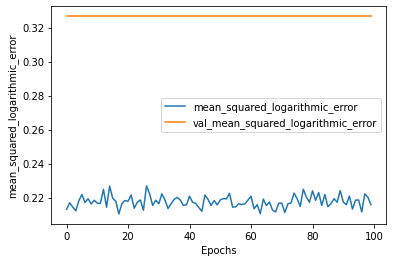

In [19]:
plot_history(history1, 'mean_squared_logarithmic_error')

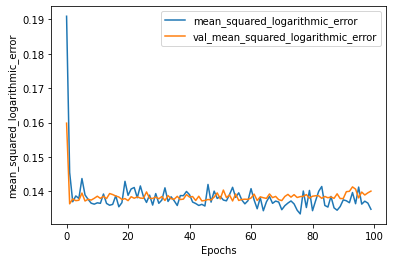

In [20]:
plot_history(history2, 'mean_squared_logarithmic_error')

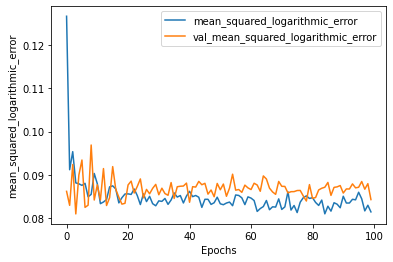

In [21]:
plot_history(history3, 'mean_squared_logarithmic_error')

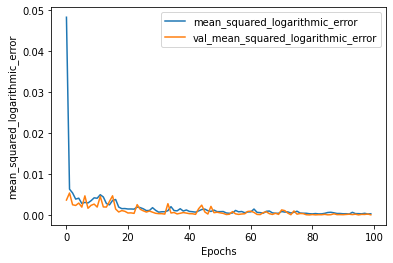

In [22]:
plot_history(history4, 'mean_squared_logarithmic_error')

In [23]:
X_test

,Frequency,Max_Deflection,Average_Deflection,Depth_prediction,L1_prediction,L2_prediction,Mode_prediction
292,1.121715,-0.453758,1.209921,-3.986738,0.346107,0.236967,0.890387
630,-1.525987,-0.360693,-0.409044,-5.887136,0.251952,0.285340,-33.400749
1200,-1.534324,-0.353902,0.252390,-5.665795,0.249719,0.119179,-32.039223
113,1.248675,-0.440175,0.304516,-3.633924,0.354768,0.251182,1.498264
174,-1.521114,-0.356920,-0.814267,-6.087854,0.292745,0.344326,-34.155758
...,...,...,...,...,...,...,...
381,0.192005,2.228778,1.802571,-3.787528,0.249295,0.238698,0.284395
1019,1.233511,-0.437660,-1.321928,-3.871243,0.259433,0.660847,1.494656
363,0.190038,2.225509,1.228052,-3.436050,0.280810,0.401845,0.284395
594,-1.521825,-0.358681,-0.525421,-5.931375,0.266111,0.300038,-33.545265
